#### Mini Project 2 - Cifar10 Object Classification CNN Model ####

1. Please write code in the cells marked ' # TO DO '
2. Read all the comments in every cell so you do not miss out any instruction.
3. Please do not change any variable names as the rest of the pre-populated code look for those variables.
4. Please also make sure you have read the project instructions document.

In [1]:
# Import Modules that will be required for this project
# Set Random Seed for consistency

import numpy as np
import torch
from matplotlib import pyplot as plt
import pandas as pd

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchsummary import summary

import os

from skimage import io,transform
from skimage.color import rgb2gray


import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(1)

In [2]:
# Check if GPU is available else run on CPU
torch.cuda.is_available = lambda : False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# TO DO

# Please enter, between the quotes', the data path for your directory or folder where you want to save your model
# This example is mine
# Do not change the variable name 'data_path'

data_path = 'C:/Users/Noot-PC/Documents/INFO 4150/Project 2/cifar/'

In [4]:
# This cell is not important but it can show you the files in your directory to chjeck the path ios correct
# Comment it out if you do not need it.

for root, dirs, files in os.walk(data_path, topdown=False):
        for name in files:
              print(os.path.join(root, name))

C:/Users/Noot-PC/Documents/INFO 4150/Project 2/cifar/model.pth
C:/Users/Noot-PC/Documents/INFO 4150/Project 2/cifar/model_final
C:/Users/Noot-PC/Documents/INFO 4150/Project 2/cifar/results.pth


In [5]:
# Read in the data files
# Keep the dataframe names unchanged as they are used later on
# The data files should be in the same directory as the .ipynb file

Cifar_data =  pd.read_csv('cifar10.csv')
Cifar_test = pd.read_csv('cifar_test.csv')

In [6]:
Cifar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [18]:
# Get a good understanding of what is being done to build this class
# You will answer about it in the Questions section

class cifar(Dataset):

    def __init__(self, data,transforms=None):
        self.image = data.drop(columns=['label'])
        self.labels = data['label']
        self.transforms = transforms
        

    def __len__(self):
        return len(self.labels)


    def __getitem__(self,idx):

        img = np.array(self.image.iloc[idx]).reshape(3,32,32).transpose(1,2,0)
        img = img/255.0
        img = rgb2gray(img)
        img = img.reshape(1,32,32)
        
        label = self.labels[idx]
        label = np.array(label).reshape(-1,1)
        
        if self.transforms is not None:
            img = self.transforms(img)
                               
        return torch.from_numpy(img),torch.from_numpy(label)

In [19]:
# Amount of data - train and test while testing the __len__ method

train_data =  cifar(Cifar_data)
test_data =  cifar(Cifar_test)
print(f"Data Length of train and test set:{train_data.__len__(),test_data.__len__()}")
print(f"\nCheck data is loaded and test data shape:\n\n{train_data[0][1]},\n\n{train_data[0][0],test_data[0][0].shape}")

Data Length of train and test set:(50000, 10000)

Check data is loaded and test data shape:

tensor([[6]]),

(tensor([[[0.2409, 0.1776, 0.1885,  ..., 0.5325, 0.5062, 0.5003],
         [0.0751, 0.0000, 0.0374,  ..., 0.3649, 0.3462, 0.3619],
         [0.0941, 0.0330, 0.1188,  ..., 0.3481, 0.3498, 0.3075],
         ...,
         [0.6774, 0.6064, 0.6240,  ..., 0.5263, 0.1356, 0.1452],
         [0.5671, 0.5011, 0.5675,  ..., 0.5951, 0.2644, 0.2275],
         [0.5843, 0.5285, 0.5721,  ..., 0.7358, 0.4806, 0.3810]]],
       dtype=torch.float64), torch.Size([1, 32, 32]))


Shape of Image as it comes from the get_item method:torch.Size([1, 32, 32]),

Data type of image and label:(<class 'torch.Tensor'>, <class 'torch.Tensor'>)

Image has been reshaped for display purposes only:(32, 32)
Shape of the label:torch.Size([1, 1])



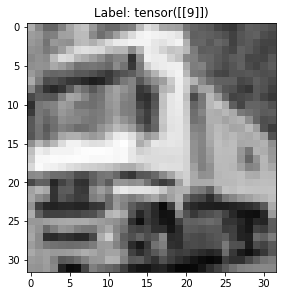

In [20]:
# Look at an image - this also tests the __getitem__ method
# This also gives a check point on shape and that we have a tensor.

image1,label1 = train_data.__getitem__(1)
print(f"Shape of Image as it comes from the get_item method:{image1.shape},\n\nData type of image and label:{type(image1),type(label1)}\n")
image1 = (image1.numpy()).reshape(32,32)
print(f"Image has been reshaped for display purposes only:{image1.shape}")
print(f"Shape of the label:{label1.shape}\n")
io.imshow(image1)
plt.title('Label: '+str(label1))
plt.show()

In [21]:
# Inititalize the Dataloader Class

train_loader = DataLoader(dataset=train_data, batch_size=100,shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=100,shuffle=False)

In [22]:
# Check Dataloader is getting the correct inputs and that it is generating the batches

for i , (x_batch,y_batch) in enumerate(train_loader):     
    break
print(f"Check batch is being loaded as expected:{x_batch.shape,y_batch.shape}")

Check batch is being loaded as expected:(torch.Size([100, 1, 32, 32]), torch.Size([100, 1, 1]))


In [23]:
# TO DO

# Complete the building of the model
# Do not change the name, Net, of the class as it is used later

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # Max_Pooling=2
        self.conv1 = nn.Conv2d(1,32,kernel_size=3,padding=1)
        self.conv2_dropout = nn.Dropout2d(p=.2)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,padding=1)
        self.conv3_dropout = nn.Dropout2d(p=.2)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,padding=1)
        
        self.fc1 = nn.Linear(8*8*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)
        
    def forward(self, x):
        # Layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        
        # Layer 2
        x = self.conv2(x)
        x = self.conv2_dropout(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        
        # Layer 3
        x = self.conv3(x)
        # x = self.conv3_dropout(x)
        x = F.relu(x)
        x = x.view(-1, 8*8*128)
        
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [24]:
model = Net()
summary(model,(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
            Conv2d-2           [-1, 64, 16, 16]          18,496
         Dropout2d-3           [-1, 64, 16, 16]               0
            Conv2d-4            [-1, 128, 8, 8]          73,856
            Linear-5                 [-1, 1024]       8,389,632
            Linear-6                  [-1, 512]         524,800
            Linear-7                   [-1, 10]           5,130
Total params: 9,012,234
Trainable params: 9,012,234
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.57
Params size (MB): 34.38
Estimated Total Size (MB): 34.96
----------------------------------------------------------------


In [25]:
# Initialize parameters 
# Try the SGD optimizer and then run it with Adam by uncommenting it
# Choose which one you want to retain based on model performance

lr = 0.001
n_epochs = 1
log_interval = 10
loss_fn = nn.CrossEntropyLoss() 

optimizer = optim.Adam(model.parameters(),lr=lr)

In [26]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_data) for i in range(n_epochs + 1)]

In [27]:
# Function that runs the Train step
# It is first set to training mode

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        print(data.shape, target.shape)
        data,target = data.float(),target.long()
        optimizer.zero_grad()
        output = model(data)
        
        output = torch.squeeze(output)
        target = torch.squeeze(target)
        #print(output.shape,target.shape)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_data),
                100. * batch_idx* len(data) / len(train_data), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*100) + ((epoch-1)*len(train_data)))
            torch.save(model.state_dict(), data_path+'model.pth')
            torch.save(model, data_path+'model_final')
            #torch.save(optimizer.state_dict(), data_path)
            torch.save(optimizer.state_dict(),data_path + 'results.pth')

In [28]:
# Function that runs the Test Set
# It is first set to Eval mode

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data,target = data.float(),target.long()
            output = model(data)
            
            output = torch.squeeze(output)
            target = torch.squeeze(target)
            #print(output.shape,target.shape)
            test_loss += loss_fn(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_data),
        100. * correct / len(test_data)))

In [ ]:
# Calling the train and test functions and running the model
# Keeping track of time elapased

# Include evaluation requirements

import time
from datetime import timedelta

start_time = time.time()


test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
    
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


Test set: Avg. loss: 2.3027, Accuracy: 1000/10000 (10%)

torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.301859
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
Train Epoch: 1 [1000/50000 (2%)]	Loss: 2.301242
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
torch.Size([100, 1, 32, 32]) torch.Size([100, 1, 1])
t

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

#### Predict ####

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
model = torch.load(data_path+'model_final')

In [22]:
def classify(model,image,classes):
    image = io.imread(image)
    image = transform.resize(image,(32,32,3))
    #image = image/255
    image = rgb2gray(image)
    image = image.reshape(1,32,32)
    
    model = model.eval()
    image = torch.from_numpy(image)
    
    image = image.float()
    image = image.unsqueeze(0)
    output = model(image)
    _,predicted = torch.max(output.data,1)
    print(classes[predicted.item()])

In [23]:
pics = ['airplane.jpg','automobile.jpg','bird.jpeg','cat.jpg','deer.jpg','dog.jpg','frog.jpg','horse.jpg','ship.jpg','truck.jpeg']

for i in pics:
    classify(model,i,classes)

airplane
automobile
bird
ship
deer
dog
frog
horse
ship
cat


## a. Explain in detail the strategy used in implementing the Dataset class. The answer should clearly describe how the data is being accessed in the __init__ function, and how it is delivered to the DataLoader It should also explain the processing I am doing on the images in the __get_item__ method. ##


In the Dataset class, the __init__ function at the instantiation of the class, meaning it is called immediately at declaration. At the initialization, the Dataset class requires a parameter: data. This data is read in and saved in 3 variables that are created and tied to the class: image, labels, transforms. Image takes everything from the data passed in except for the 'label' column, labels takes only the 'label' column, and transforms takes nothing because there is no transforms needed.
The __len__ function just returns the length of the labels, the overall number of data points. 
The __getitem__ function is where the data is accessed by the DataLoader. The purpose of the function is to give the DataLoader a single image and label. First it transposes the image for it to be in a more palatable format for pytorch, as it takes in [layers, length. width] while the image is given in [length,width,layers]. Additionally, the colors are layered as 3s, and need to be rearranged in channels. After its been converted, its normalized to make the gradient descent smoother. The image is then converted to gray and its layers reduced to 1. The label for the index the DataLoader requested is pulled and then reformatted. The transforms are also applied here if there are any, in our case we default to none. Then, the reformatted image and label are sent to DataLoader as torch tensors.

## b. Describe in brief, the 3 main things that this complete application is doing, and the parameters one can tweak to build a good final model. ##

The three main steps are build, train, and test the model.
Firstly, the program is building the model. It does this by creating a class to hold the data, pulling in data, and feeding it to the DataLoader in batches. Second, this data is fed in batches to the neural network, where it trains on it and tested for the accuracy of the model at that stage. Once it has been trained, the model is used to predict new pictures.

The user could tweak the epochs to build a better model. By increasing the epochs, the model has more to train off and improve its accuracy. Another way would use dropout functions, which randomly drop specific nodes in a neural net during training. This would prevent overtraining and improve the overall acuracy. Adjusting the kernel size, padding, and maxpool size can also improve the accuracy at the cost of speed.

## c. How accurate were your predictions on percentage basis? ## 

In terms of the test data, it was 53% effective. For the predictions, it was 80% effective.

## d. What were the challenges you faced while completing this HW and what helped you in putting it together? ## 

Some of the challenges were getting to understand the full neural network. While the overall process was not bad, it was mostly the numbers between the layers. Once I figured that out, I had a big issue with my gpu messing up the program by consistently causing type errors with the program. The video lectures helped me understand how to fix the issues and also how the numbers worked out. The other issue I had was figuring out where best to put the dropout layer, or if I should have two. I figured this out by testing the model multiple times to see which would give better results.